In [35]:
from ase.io import read
from ase.units import create_units, Ry, kB, Bohr
from ase.visualize import view
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
units = create_units("2014")
bar = units["bar"]

**Effect of k-points**

Text(0, 0.5, 'Energy (Ry)')

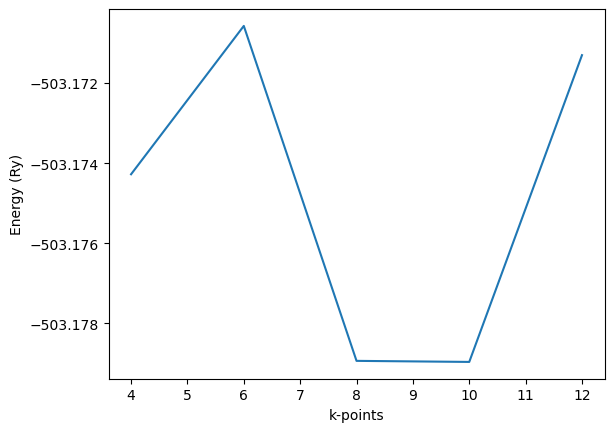

In [37]:
ZnO_cub_k4 = read("./cubic/ZnO_mp-13161_cubic-1.0-k4.out", format="espresso-out")
ZnO_cub_k6 = read("./cubic/ZnO_mp-13161_cubic-1.0-k6.out", format="espresso-out")
ZnO_cub_k8 = read("./cubic/ZnO_mp-13161_cubic-1.0-k8.out", format="espresso-out")
ZnO_cub_k10 = read("./cubic/ZnO_mp-13161_cubic-1.0-k10.out", format="espresso-out")
ZnO_cub_k12 = read("./cubic/ZnO_mp-13161_cubic-1.00.out", format="espresso-out")

k_list = [4,6,8,10,12]
energy_list = [ZnO_cub_k4.get_total_energy()/Ry, 
               ZnO_cub_k6.get_total_energy()/Ry, 
               ZnO_cub_k8.get_total_energy()/Ry, 
               ZnO_cub_k10.get_total_energy()/Ry, 
               ZnO_cub_k12.get_total_energy()/Ry]

plt.plot(k_list, energy_list)
plt.ticklabel_format(useOffset=False)
plt.xlabel("k-points")
plt.ylabel("Energy (Ry)")

**Effect of cut-off energy**

Text(0, 0.5, 'Energy (Ry)')

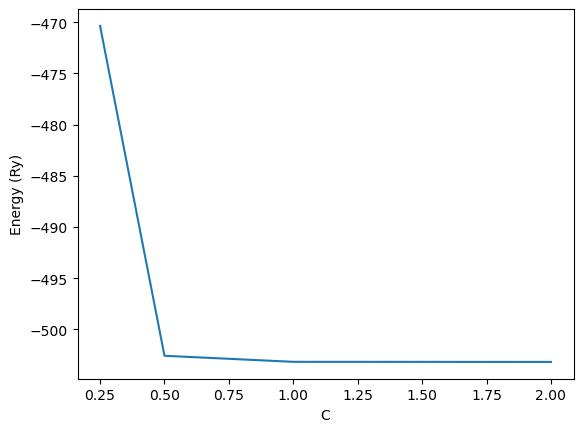

In [38]:
ZnO_cub_200co = read("./cubic/ZnO_mp-13161_cubic-co2.out", format="espresso-out")
ZnO_cub_100co = read("./cubic/ZnO_mp-13161_cubic-1.00.out", format="espresso-out")
ZnO_cub_50co = read("./cubic/ZnO_mp-13161_cubic-co0.5.out", format="espresso-out")
ZnO_cub_25co = read("./cubic/ZnO_mp-13161_cubic-co0.25.out", format="espresso-out")

cutoff_list = [0.25, 0.5, 1, 2]
energy_list = [ZnO_cub_25co.get_total_energy()/Ry, 
               ZnO_cub_50co.get_total_energy()/Ry, 
               ZnO_cub_100co.get_total_energy()/Ry, 
               ZnO_cub_200co.get_total_energy()/Ry]

plt.plot(cutoff_list, energy_list)
plt.ticklabel_format(useOffset=False)
plt.xlabel("C")
plt.ylabel("Energy (Ry)")

**Calculate bulk modulus**

In [39]:
#write cubic bulk bulk modulus txt file and show E V diagram
#lattice constant
a0 = 2.69185600
b0 = a0
c0 = a0

volume_list = []
energy_list = []
stress_list = []
amplifier = np.arange(0.90, 1.10, 0.02)
for amp in amplifier:
    amp = "{:.2f}".format(amp)                                      #keep format to be the same
    filename = "./cubic/ZnO_mp-13161_cubic-" + str(amp) + ".out"
    ZnO_cub = read(filename)
    volume_list.append(ZnO_cub.get_volume())                        #unit A^3
    energy_list.append(ZnO_cub.get_total_energy()/Ry)               #unit Ry
    stress_list.append(np.trace((ZnO_cub.get_stress(voigt=False) / bar) / 1000)/3)    #unit kbar

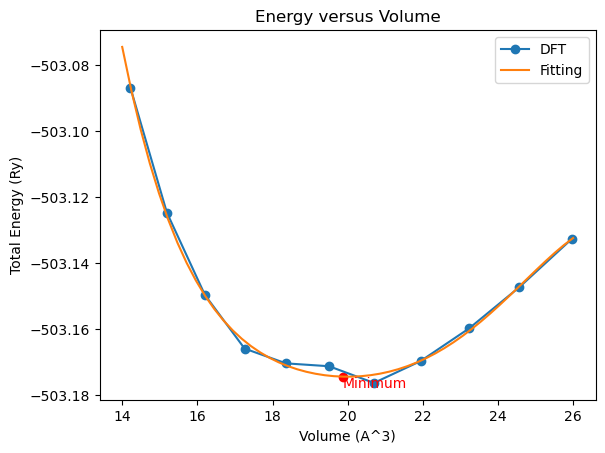

Minimum energy lattice constant: 2.7088666 A
Accuracy of prediction: 0.9936807002930967


In [40]:
#plot energy volume curve
coef = np.polyfit(volume_list, energy_list, 5)
f = np.poly1d(coef)
volume_fit = np.linspace(14, 26, 50)
energy_fit = f(volume_fit)
energy_min_index = np.argmin(energy_fit)

plt.plot(volume_list, energy_list, marker='o')
plt.plot(volume_fit, energy_fit)
plt.scatter(volume_fit[energy_min_index], energy_fit[energy_min_index], color='red')
plt.annotate("Minimum", (volume_fit[energy_min_index], energy_fit[energy_min_index]), color = "red", va = "top")
plt.xlabel("Volume (A^3)")
plt.ylabel("Total Energy (Ry)")
plt.legend(["DFT", "Fitting"])
plt.title("Energy versus Volume")
plt.show()

a = volume_fit[energy_min_index]**(1/3)
accuracy = 1 - abs(a-a0)/a0
print("Minimum energy lattice constant:", "{:.7f}".format(a), "A")
print("Accuracy of prediction:", accuracy)

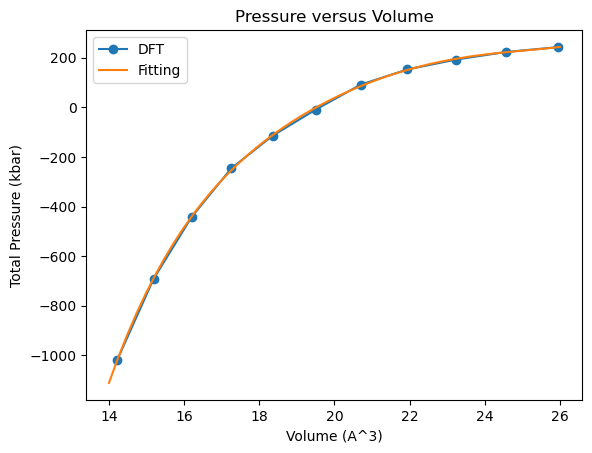

In [41]:
#plot pressure volume curve
coef = np.polyfit(volume_list, stress_list, 5)
f = np.poly1d(coef)
dp_dv = f.deriv()
volume_fit = np.linspace(14, 26, 50)
stress_fit = f(volume_fit)

plt.plot(volume_list, stress_list, marker='o')
plt.plot(volume_fit, stress_fit)
plt.ticklabel_format(useOffset=False)
plt.xlabel("Volume (A^3)")
plt.ylabel("Total Pressure (kbar)")
plt.legend(["DFT", "Fitting"])
plt.title("Pressure versus Volume")
plt.show()

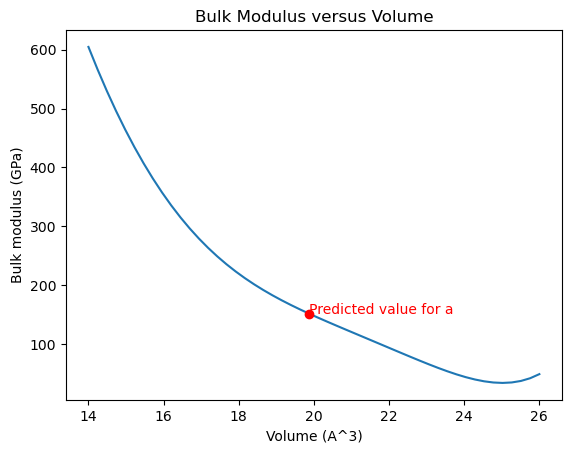

Predicted stress at a: 151.66478135438444 GPa
Accuracy of prediction: 0.9420172754930711


In [42]:
#plot bulk modulus volume curve
stress_fit = dp_dv(volume_fit)* volume_fit / 10 #GPa
stress_mp_predict = dp_dv(a**3)*(a**3) / 10 #GPa
stress_mp = 161 #GPa

plt.plot(volume_fit, stress_fit)
plt.plot(a**3, stress_mp_predict, 'ro')
plt.annotate("Predicted value for a", (a**3, stress_mp_predict), color = "red")
plt.xlabel("Volume (A^3)")
plt.ylabel("Bulk modulus (GPa)")
plt.title("Bulk Modulus versus Volume")
plt.show()

accuracy = 1 - abs(stress_mp - stress_mp_predict) / stress_mp
print("Predicted stress at a:", stress_mp_predict, "GPa")
print("Accuracy of prediction:", accuracy)

**Caculate shear modulus**

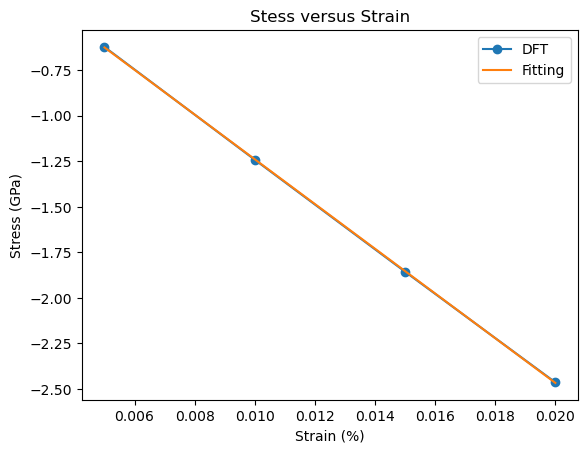

Shear modulus: -122.84744105770352 GPa
accuracy of prediction: 0.9930537618221023


In [43]:
xy_strain = []
xy_stress = []

strain_list = np.arange(0.005, 0.025, 0.005)
for strain in strain_list:
    ZnO_cubic = read("./cubic/ZnO_mp-13161_cubic-" + str(strain) + "shear.out")
    xy_stress.append(((ZnO_cubic.get_stress() / bar) / 10000)[5]) #GPa

coef = np.polyfit(strain_list, xy_stress, 1)
f = np.poly1d(coef)
shear_modulus = coef[0]

plt.plot(strain_list, xy_stress, marker = "o")
plt.plot(strain_list, f(strain_list))
plt.xlabel("Strain (%)")
plt.ylabel("Stress (GPa)")
plt.title("Stess versus Strain")
plt.legend(["DFT", "Fitting"])
plt.show()

accuracy = 1 - abs((-122 - shear_modulus)/(-122))
print("Shear modulus:", shear_modulus, "GPa")
print("accuracy of prediction:", accuracy)

**Calculate oxygen vacancy formation energy**

In [44]:
oxygen = read("./single_atom/oxygen.out")
oxygen_energy = oxygen.get_total_energy()

In [45]:
#1*1*1 cell
ZnO_cubic_complete = read("./cubic/ZnO_mp-13161_111cubic_complete.out")
ZnO_cubic_vacant = read("./cubic/ZnO_mp-13161_111cubic_vacant.out")

complete_energy = ZnO_cubic_complete.get_total_energy()    #unit eV
vacant_energy = ZnO_cubic_vacant.get_total_energy()    #unit eV

complete_atom = ZnO_cubic_complete.get_global_number_of_atoms()

O_vf_energy = vacant_energy - complete_energy + oxygen_energy

print("Oxygen vacancy energy:", O_vf_energy, "eV")

Oxygen vacancy energy: 6.363776818085853 eV


In [46]:
#2*2*2 cell
ZnO_cubic_complete = read("./cubic/ZnO_mp-13161_222cubic_complete.out")
ZnO_cubic_vacant = read("./cubic/ZnO_mp-13161_222cubic_vacant.out")

complete_energy = ZnO_cubic_complete.get_total_energy()    #unit eV
vacant_energy = ZnO_cubic_vacant.get_total_energy()   #unit eV

complete_atom = ZnO_cubic_complete.get_global_number_of_atoms()

O_vf_energy = vacant_energy - complete_energy + oxygen_energy

print("Oxygen vacancy energy:", O_vf_energy, "eV")

Oxygen vacancy energy: 7.357196142443854 eV


**Hydrogen absorption energy**

In [58]:
ZnO = read("./cubic/ZnOH_mp-13161_cubic.in")
view(ZnO)

<Popen: returncode: None args: ['/home/xiangruili/anaconda3/bin/python', '-m...>

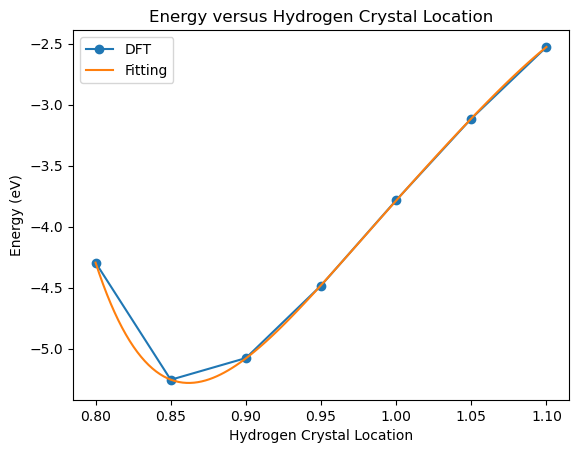

Hydrogen crystal location with minimum energy: 0.8630252100840337
Hydrogen absorption energy: -5.279740037471129


In [57]:
H = read("./single_atom/hydrogen.out")
ZnO0 = read("./cubic/ZnOH_mp-13161_cubic-film.out")
ZnOH_80 = read("./cubic/ZnOH_mp-13161_cubic-0.8top.out")
ZnOH_85 = read("./cubic/ZnOH_mp-13161_cubic-0.85top.out")
ZnOH_90 = read("./cubic/ZnOH_mp-13161_cubic-0.9top.out")
ZnOH_95 = read("./cubic/ZnOH_mp-13161_cubic-0.95top.out")
ZnOH_100 = read("./cubic/ZnOH_mp-13161_cubic-1top.out")
ZnOH_105 = read("./cubic/ZnOH_mp-13161_cubic-1.05top.out")
ZnOH_110 = read("./cubic/ZnOH_mp-13161_cubic-1.1top.out")

energy = [
    ZnOH_80.get_total_energy() - ZnO0.get_total_energy() - H.get_total_energy(),
    ZnOH_85.get_total_energy() - ZnO0.get_total_energy() - H.get_total_energy(),
    ZnOH_90.get_total_energy() - ZnO0.get_total_energy() - H.get_total_energy(),
    ZnOH_95.get_total_energy() - ZnO0.get_total_energy() - H.get_total_energy(),
    ZnOH_100.get_total_energy() - ZnO0.get_total_energy() - H.get_total_energy(),
    ZnOH_105.get_total_energy() - ZnO0.get_total_energy() - H.get_total_energy(),
    ZnOH_110.get_total_energy() - ZnO0.get_total_energy() - H.get_total_energy(),
]

distance = [0.8, 0.85, 0.9, 0.95, 1, 1.05, 1.1]

coef = np.polyfit(distance, energy, 5)
f = np.poly1d(coef)
x_fit = np.linspace(0.8, 1.1, 120)
y_fit = f(x_fit)

plt.plot(distance, energy, marker = "o")
plt.plot(x_fit, y_fit)
plt.xlabel("Hydrogen Crystal Location")
plt.ylabel("Energy (eV)")
plt.title("Energy versus Hydrogen Crystal Location")
plt.legend(["DFT", "Fitting"])
plt.show()

energy_min_index = np.argmin(y_fit)
location_min = x_fit[energy_min_index]
print("Hydrogen crystal location with minimum energy:", location_min)
print("Hydrogen absorption energy:", min(y_fit))
